# Plot Evaluation Results

In [ ]:
!pip install pandas matplotlib seaborn

In [43]:
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [45]:
df = pd.DataFrame(columns=["filename", "optimization_type", "line_reduction"])

for optimization_type in ["tdce", "lvn", "combined"]:

    bril_files = glob.glob(f"./{optimization_type}/*.bril")

    for bril_file in bril_files:
        bril_name = bril_file.split("/")[-1]

        with open(bril_file, "r") as f:
            bril_lines = f.readlines()
        # df.loc[len(df)] = [bril_name, len(bril_lines), False]

        out_file = bril_file.replace(".bril", ".out")
        with open(out_file, "r") as f:
            out_lines = f.readlines()
        # df.loc[len(df)] = [bril_name, len(out_lines), True]

        df.loc[len(df)] = [bril_name, optimization_type, len(bril_lines) - len(out_lines)]


In [51]:
df.to_csv("results.csv")
df

,filename,optimization_type,line_reduction
0,quadratic.bril,tdce,5
1,montgomery.bril,tdce,12
2,primes-between.bril,tdce,3
3,mod_pow.bril,tdce,1
4,orders.bril,tdce,21
...,...,...,...
199,sum-divisible-by-m.bril,combined,3
200,fizz-buzz.bril,combined,5
201,bitwise-ops.bril,combined,19
202,sum-digits.bril,combined,2


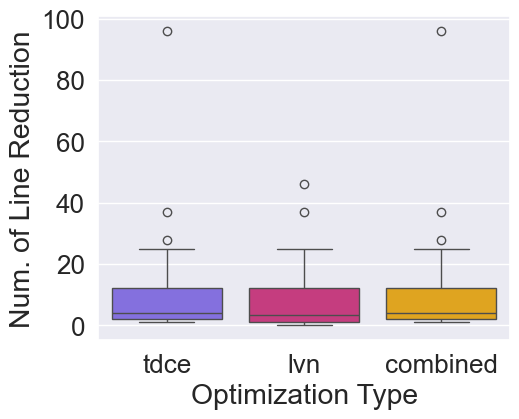

In [ ]:
plt.figure(figsize=(5, 4))

palette = {
    "tdce": "#785ef0",   # blue
    "lvn":  "#dc267f",   # orange
    "combined":  "#ffb000",   # green
}

sns.set_theme(color_codes=True, font_scale=1.7)

t = df.copy()
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]

ax = sns.boxplot(data=t, x="Optimization Type", y="Num. of Line Reduction", hue="Optimization Type", palette=palette)

plt.tight_layout(pad=0)

<Figure size 500x400 with 0 Axes>

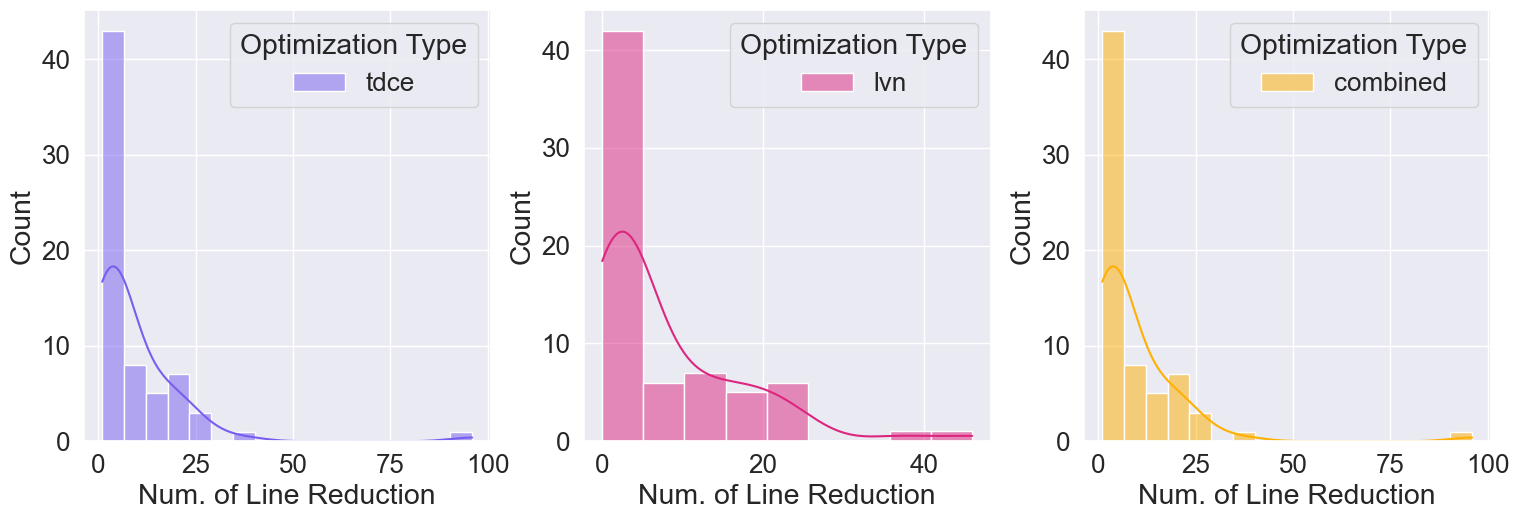

In [ ]:
plt.figure(figsize=(5, 4))

sns.set_theme(color_codes=True, font_scale=1.7)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

t = df.copy()
t = t[t["optimization_type"] == "tdce"]
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]
ax = sns.histplot(data=t, x="Num. of Line Reduction", hue="Optimization Type", kde=True, palette=palette, ax=axes[0])

t = df.copy()
t = t[t["optimization_type"] == "lvn"]
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]
ax = sns.histplot(data=t, x="Num. of Line Reduction", hue="Optimization Type", kde=True, palette=palette, ax=axes[1])

t = df.copy()
t = t[t["optimization_type"] == "combined"]
t["Bril File"] = t["filename"]
t["Num. of Line Reduction"] = t["line_reduction"]
t["Optimization Type"] = t["optimization_type"]
ax = sns.histplot(data=t, x="Num. of Line Reduction", hue="Optimization Type", kde=True, palette=palette, ax=axes[2])

plt.tight_layout(pad=0)